In [1]:
import pandas as pd
df1=pd.read_csv(r"D:\dataset\new_data.csv")
df1

,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,outlier
0,54865,3,12,0,6,6,6.0,0.00000,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
1,55054,109,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
2,55055,52,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
3,46236,34,6,6,6,6,6.0,0.00000,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
4,54863,3,12,0,6,6,6.0,0.00000,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,32215,112,152,28,28,28.0,0.00000,76,76,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
2520794,53,324,84,362,42,42,42.0,0.00000,181,181,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
2520795,58030,82,31,6,31,0,15.5,21.92031,6,6,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1
2520796,53,1048635,192,256,32,32,32.0,0.00000,128,128,...,0.0,0.0,0,0,0.0,0.0,0,0,1,1


In [2]:
df1=df1.drop(columns=['outlier'])
df1

,Destination Port,Flow Duration,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,12,0,6,6,6.0,0.00000,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
1,55054,109,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,55055,52,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,46236,34,6,6,6,6,6.0,0.00000,6,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,54863,3,12,0,6,6,6.0,0.00000,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520793,53,32215,112,152,28,28,28.0,0.00000,76,76,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2520794,53,324,84,362,42,42,42.0,0.00000,181,181,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2520795,58030,82,31,6,31,0,15.5,21.92031,6,6,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
2520796,53,1048635,192,256,32,32,32.0,0.00000,128,128,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1


In [3]:
X = df1.drop(columns=['Label'])
y = df1['Label']

# Increase range to ensure at least 5647 samples
X = X.iloc[30900:309300]  
y = y.iloc[30900:309300]

print(X.shape[0])

sampled_indices = X.sample(n=300,random_state=42).index
X = X.loc[sampled_indices]
y = y.loc[sampled_indices]
X = df1.drop(columns=['Label'])
y = df1['Label']

X = X.iloc[30900:309300]  
y = y.iloc[30900:309300]

print("Initial shape:", X.shape[0])

# Sample 13 points
sampled_indices = X.sample(n=300, random_state=42).index
X = X.loc[sampled_indices]
y = y.loc[sampled_indices]

# Get label distribution
print("Label distribution in sampled data:")
print(y.value_counts())


278400
Initial shape: 278400
Label distribution in sampled data:
Label
 1    182
-1    118
Name: count, dtype: int64


Number of components to retain 90% variance: 13


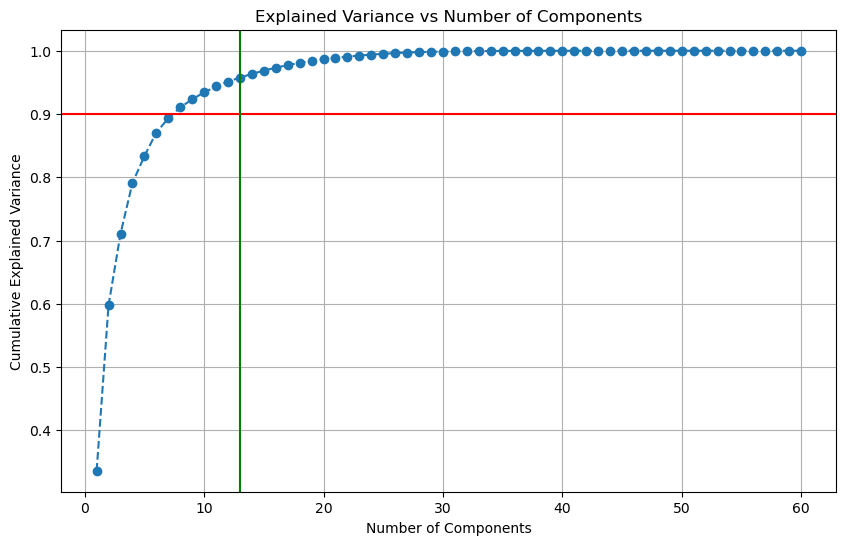

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = MinMaxScaler(feature_range=(0, np.pi))
X = scaler.fit_transform(X_scaled)
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 90% variance
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

# Number of components selected
n_components_selected = pca.n_components_
print(f"Number of components to retain 90% variance: {n_components_selected}")

# Now let's plot how much variance each component explains

# If you want to see how each component contributes
pca_full = PCA()
pca_full.fit(X)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Cumulative variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axvline(x=n_components_selected, color='g', linestyle='-')
plt.title('Explained Variance vs Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [5]:
from sklearn.decomposition import PCA

# Reduce to 12 features (same as num_qubits)
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [6]:
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap

#from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
from qiskit_machine_learning.algorithms import QSVC
from qiskit.providers import BackendV2 as Backend
from qiskit.transpiler import Target
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap
# from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit_machine_learning.algorithms import PegasosQSVC
from qiskit_machine_learning.algorithms import QSVC
from qiskit.primitives import StatevectorSampler, Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.algorithms import QSVC# number of qubits is equal to the number of features
num_qubits = 8
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=2)
sampler = Sampler()
fidelity = ComputeUncompute(sampler=sampler)
qkernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

C:\Users\HP\AppData\Local\Temp\ipykernel_13712\3587357187.py:19: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()
C:\Users\HP\AppData\Local\Temp\ipykernel_13712\3587357187.py:20: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  fidelity = ComputeUncompute(sampler=sampler)


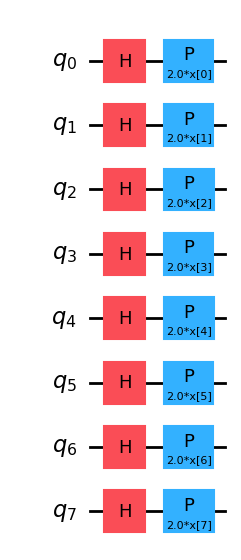

In [7]:
+++feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=1)
#Decompose Circuit
feature_map.decompose().draw('mpl')

In [9]:
from qiskit_machine_learning.algorithms import QSVC
from qiskit.providers import BackendV2 as Backend
from qiskit.transpiler import Target
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from qiskit_aer import Aer
from qiskit.primitives import Sampler

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session



In [10]:
backend = AerSimulator()
# Create sampler with the backend
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend)
# sampler= StatevectorSampler()

In [11]:
feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=2)
qkernel = FidelityQuantumKernel(feature_map=feature_map)

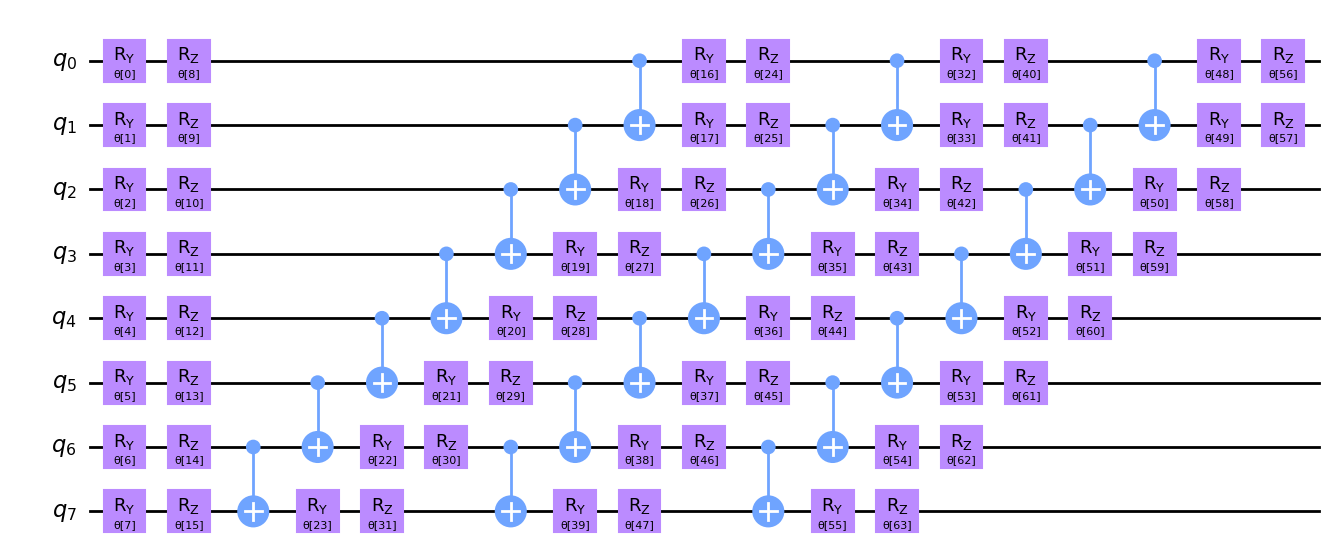

In [13]:
from qiskit.circuit.library import RealAmplitudes, EfficientSU2
ansatz = EfficientSU2(num_qubits=num_qubits, reps=3)
# ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", style="clifford", )

In [22]:
from qiskit_machine_learning.optimizers import COBYLA

optimizer = COBYLA(maxiter=50)

In [23]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

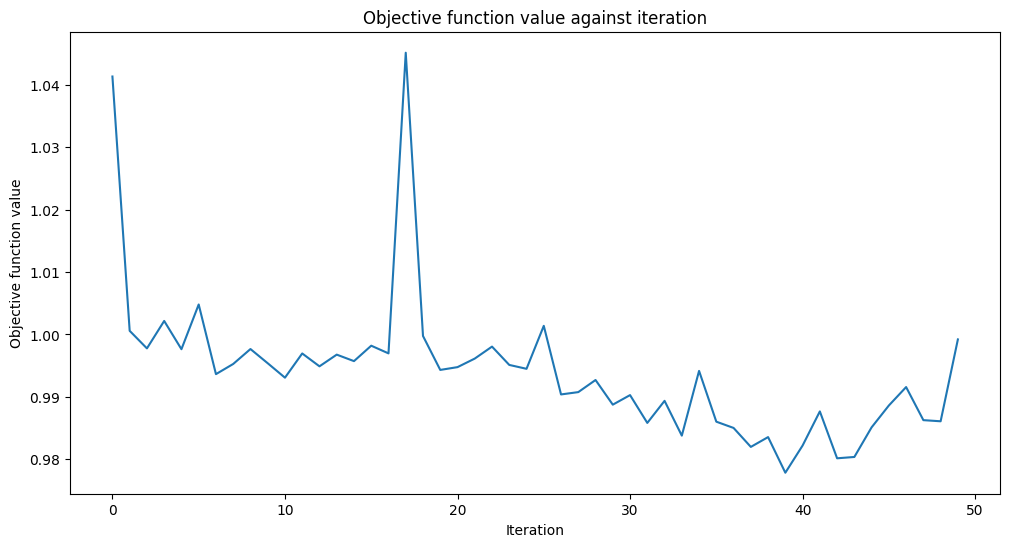

Training time: 90 seconds


In [24]:
import time
from qiskit.primitives import Sampler
from qiskit.transpiler import PassManager
import numpy as np
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)



start = time.time()

# Use PCA-transformed data for training
vqc.fit(X_train_pca, np.array(y_train))

elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")


In [25]:
train_score_q4 = vqc.score(X_train_pca, y_train)
test_score_q4 = vqc.score(X_test_pca, y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.61
Quantum VQC on the test dataset:     0.57
